# **AT1- Kaggle Competition Week 2: Advance MLA**
## Feature engineering and trying models that can handle non-linear relationships 




## 1. Load and Explore Dataset



**[1.1]** Launch magic commands to automatically reload modules

In [1]:
%load_ext autoreload
%autoreload 2

**[1.2]** Import the pandas and numpy package

In [2]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**[1.3]** Load the dataset into dataframe called df_train

In [3]:
df_train = pd.read_csv('../data/raw/train.csv')

In [4]:
# Reading test data into df_test
df_test = pd.read_csv('../data/raw/test.csv')

**[1.4]** Display the first 5 rows of df

In [5]:
df_train.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


**[1.5]** Display the dimensions (shape) of df

In [6]:
df_train.shape

(56091, 64)

**[1.6]** Display the number of drafted vs non-drafted players of target variable


<Axes: xlabel='drafted', ylabel='count'>

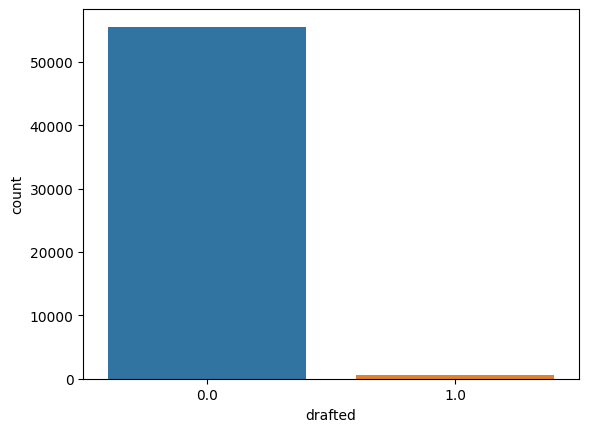

In [7]:
# Distribution of target variable
sns.countplot(x='drafted', data=df_train)

In [8]:
# Count the number of target value
df_train['drafted'].value_counts()

0.0    55555
1.0      536
Name: drafted, dtype: int64

**Note:** Only 0.9% of the players have been drafted into NBA league out of the total data samples given. This leaves us a room for data oversampling and splitting data into train/val correctly. 

## 2. Prepare Data

**[2.1]** Create a copy of df and save it into a variable called df_cleaned

In [9]:
df_cleaned = df_train.copy()

**[2.2]** Check duplicate values 

In [10]:
#check for any duplicate rows in df
print(df_cleaned.duplicated(subset=['player_id']).sum())

32162


In [11]:
#remove duplicates
df_cleaned = df_cleaned.loc[~df_cleaned.duplicated(['player_id']), :]

In [12]:
# check for duplicates after
print(df_cleaned.duplicated(subset=['player_id']).sum())

0


In [13]:
#reset the index with respect to the number of rows 
df_cleaned.reset_index(inplace=True, drop=True) 

**[2.3]** Remove high missing values column and unnecessary features. From the metadata, we see that player number i.e "num" column is not imp and "ht" (height of the player) is incorrect. Similarly columns with very high percentage of missing values should be removed. 

In [14]:
per_null = df_cleaned.isnull().mean() * 100

In [15]:
# show top 20 features with high percentages of null value
per_null.nlargest(20)

pick                   97.442434
Rec_Rank               74.261357
dunks_ratio            66.914622
mid_ratio              31.121234
rim_ratio              30.728405
rimmade                23.168540
rimmade_rimmiss        23.168540
midmade                23.168540
midmade_midmiss        23.168540
dunksmade              23.168540
dunksmiss_dunksmade    23.168540
num                    19.315475
ast_tov                10.832045
yr                      0.965356
ht                      0.267458
drtg                    0.108655
adrtg                   0.108655
dporpag                 0.108655
stops                   0.108655
bpm                     0.108655
dtype: float64

In [16]:
# removing features with more than 15% missing values
df_cleaned = df_cleaned.drop(['player_id','team','num','conf','yr','pick', 'Rec_Rank', 'dunks_ratio', \
                              'mid_ratio', 'rim_ratio', 'rimmade', 'rimmade_rimmiss','midmade',\
                              'midmade_midmiss', 'dunksmade', 'dunksmiss_dunksmade'], axis=1) 

In [17]:
df_cleaned.shape

(23929, 48)

In [18]:
# copying test data into a separate dataframe
df_test_clean = df_test.copy()

#### We need to remove the same columns from the test set and perform label encoding and scaling as we did for train set in order to evaluate the model

In [19]:
df_test_clean = df_test_clean.drop(['player_id','team','num','conf','yr','pick', 'Rec_Rank', 'dunks_ratio', \
                              'mid_ratio', 'rim_ratio', 'rimmade', 'rimmade_rimmiss','midmade',\
                              'midmade_midmiss', 'dunksmade', 'dunksmiss_dunksmade'], axis=1)

**[2.4]** Replace missing values in the column `ast_tov`

<Axes: >

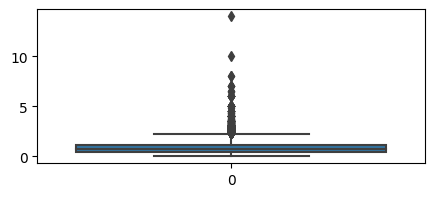

In [20]:
# fixing the figure size
fig, ax = plt.subplots(figsize= (5, 2)) 
# plotting boxplot via seaborn
sns.boxplot(df_cleaned.ast_tov)

<Axes: xlabel='ast_tov', ylabel='Density'>

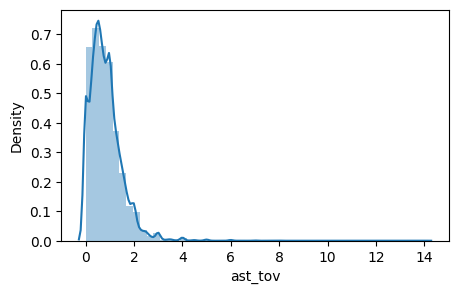

In [21]:
fig, ax = plt.subplots(figsize= (5, 3))
# plotting distribution graph 
sns.distplot(df_cleaned.ast_tov)

**[2.5]** Replace `NaN` values with 0

In [22]:
# Replace NaN values with 0
df_cleaned = df_cleaned.fillna(0)
df_test_clean = df_test_clean.fillna(0)

**[2.6]** Removing outliers with respect to the column `ast_tov`

In [23]:
from scipy import stats

z_scores = np.abs(stats.zscore(df_cleaned['ast_tov']))
threshold = 3

# Get the indices where z-score is greater than or equal to threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove rows with outlier indices from the DataFrame
df_filtered = df_cleaned.drop(index=outlier_indices)

In [24]:
median_ast_tov = df_filtered['ast_tov'].median()
df_filtered['ast_tov'] = df_filtered['ast_tov'].fillna(median_ast_tov)

In [25]:
df_filtered.shape

(23626, 48)

**[2.7]** Convert the column `ht` from date format to numerical and save it into variable called `ht_inch`

In [26]:
def convert_height_numeric(height_str):
    
    if isinstance(height_str, int or float): #handling exceptional cases
        height_str = str(height_str)
        
    if pd.isnull(height_str): # handle missing values
        return 0
    
    parts = height_str.split("-")
    
    if len(parts) < 2: #if there is just one part (date/month)
        return 0
    
    date = parts[0].strip()  # Remove leading/trailing spaces
    month = parts[1].strip()   
    
    if month=='' or date =='': # if month/date is empty (was raising keyerror '')
        return 0
    
    month_mapping = {
            'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
            'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
        }
    
    if month == '00': #when inches is 0
        inches = 0
        feet = month_mapping[date.lower()]
        
    else:
        feet = month_mapping[month.lower()]
        inches = int(date)
    
    total_inches = feet * 12 + inches #calculate height in inches
    return total_inches
    
# call the function
df_filtered['ht_inch'] = df_filtered['ht'].apply(convert_height_numeric)
df_test_clean['ht_inch'] = df_test_clean['ht'].apply(convert_height_numeric)

In [27]:
# drop original wrong format height column
df_filtered.drop(['ht'],axis=1,inplace=True)
df_test_clean.drop(['ht'],axis=1,inplace=True)

In [28]:
df_filtered.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted,ht_inch
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0.0,74
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0.0,76
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0.0,76
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0.0,76
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.0,80


In [29]:
"""
import pandas as pd

# Assuming df_filtered is your DataFrame containing the features and the 'drafted' column
numerical_features = df_filtered.select_dtypes(include=['float64', 'int64'])  # Select only numerical features

correlation_matrix = numerical_features.corr()  # Calculate the correlation matrix

# Get the correlation coefficients with the 'drafted' column
correlation_with_target = correlation_matrix['drafted']

# Filter features with correlation coefficients greater than 0.15
important_features = correlation_with_target[correlation_with_target > 0.15]

# Print the important features with their correlation coefficients
for feature, correlation in important_features.items():
    print(f"{feature}: {correlation:.2f}")
"""

'\nimport pandas as pd\n\n# Assuming df_filtered is your DataFrame containing the features and the \'drafted\' column\nnumerical_features = df_filtered.select_dtypes(include=[\'float64\', \'int64\'])  # Select only numerical features\n\ncorrelation_matrix = numerical_features.corr()  # Calculate the correlation matrix\n\n# Get the correlation coefficients with the \'drafted\' column\ncorrelation_with_target = correlation_matrix[\'drafted\']\n\n# Filter features with correlation coefficients greater than 0.15\nimportant_features = correlation_with_target[correlation_with_target > 0.15]\n\n# Print the important features with their correlation coefficients\nfor feature, correlation in important_features.items():\n    print(f"{feature}: {correlation:.2f}")\n'

**[2.8]** Extract the column `drafted` and save it into variable called `target`

In [30]:
target = df_filtered.pop('drafted')

## 3. Preprocess data

**[3.1]** Create 2 lists named `num_cols` and `cat_cols` containing respectively the names of numerical and categotical columns

In [31]:
num_cols = list(df_filtered.select_dtypes('number').columns)
cat_cols = list(set(df_filtered.columns) - set(num_cols))

In [32]:
cat_cols

['type']

### We can see the only categorical column remaining is `type`. Let's see the distribution of `type` in the data

<Axes: xlabel='type', ylabel='count'>

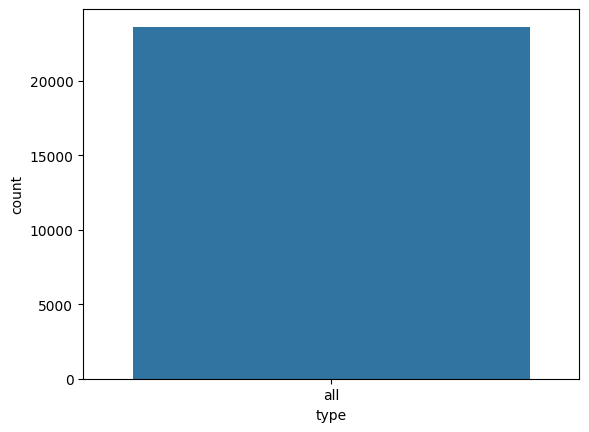

In [33]:
# Distribution of type variable
sns.countplot(x='type', data=df_filtered)

### Drop `type` column as it has only one value - all. No need for one hot encoding

In [34]:
df_filtered.drop(['type'], inplace =True, axis=1)
df_test_clean.drop(['type'], inplace =True, axis=1)

**[3.2]** Import StandardScaler from sklearn.preprocessing

In [35]:
from sklearn.preprocessing import StandardScaler

**[3.3]** Instantiate the StandardScaler. The non-linear gaussian model is not affected by feature scaling, but still doing it before saves model training time :P 

In [36]:
scaler = StandardScaler()

**[3.5]** Fit and apply the scaling on `df_filtered`

In [37]:
df_filtered[num_cols] = scaler.fit_transform(df_filtered[num_cols])

In [38]:
df_test_clean[num_cols] = scaler.transform(df_test_clean[num_cols])

In [39]:
df_filtered.shape, df_test_clean.shape

((23626, 46), (4970, 46))

In [40]:
from joblib import dump

**[3.11]** Save the one-hot encoder and scaler into the folder `models` and call the files respectively `ohe.joblib` and  `scaler.joblib`

In [40]:
dump(scaler, '../models/scaler_w2.joblib')

['../models/scaler_w2.joblib']

## 4. Split Dataset

**[4.1]** import train_test_split from sklearn.model_selection

In [41]:
from sklearn.model_selection import train_test_split

**[4.2]** Split the train data into training & validation. Split the data to create unbiased splits with the number ratio of 1's and 0's in the target

In [42]:
X_train, X_val, y_train, y_val = train_test_split(
                                            df_filtered, target, \
                                            test_size=0.3, random_state=23, \
                                            stratify = target, shuffle = True)

**[4.3]** Print the dimensions of `X_train`, `X_val`, `X_test`

In [43]:
print(X_train.shape)
print(X_val.shape)
print(df_test_clean.shape)

(16538, 46)
(7088, 46)
(4970, 46)


**[4.4]** Print the dimensions of `y_train`, `y_val`

In [44]:
print(y_train.shape)
print(y_val.shape)

(16538,)
(7088,)


**[4.5]** Save the sets into the folder `data/processed`

In [46]:
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_val.to_csv('../data/processed/y_val.csv', index=False)
df_test_clean.to_csv('../data/processed/test.csv', index=False)

## 5. Train classifier

**[5.1]** Import LogisticRegression from sklearn, initiate the class and fit the model

In [44]:
# import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter = 2000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [45]:
# import roc_auc_score from sklearn metrics
from sklearn.metrics import roc_curve, roc_auc_score

**[5.2]** Generate a numpy array with same dimensions as y_train that contains only the value saved in pred_value

In [46]:
y_val_pred_lr = lr.predict_proba(X_val)[:,1]
auc_roc_lr = roc_auc_score(y_val, y_val_pred_lr)
print(f"AUC-ROC Score for logistic regression: {auc_roc_lr}")

AUC-ROC Score for logistic regression: 0.9907426641011065


In [46]:
"""
from sklearn.gaussian_process import GaussianProcessClassifier
import time

# Create a GaussianProcessClassifier object
gpc = GaussianProcessClassifier()

# Fit the model to the data
start_time = time.time()
gpc.fit(X_train, y_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")
"""

Training time: 282.8275 seconds


In [47]:
"""
y_val_pred_gpc = gpc.predict_proba(X_val)[:,1]
auc_roc_gpc = roc_auc_score(y_val, y_val_pred_gpc)
print(f"AUC-ROC Score for Guassian Process: {auc_roc_gpc}")
"""

### Highest AUC ROC score - 0.9907 is for the logistic Regression model that means simple model is able to handle the features better than complex models and the data does not exibit non-linear relationships

**[5.3]** Get false positive rate and true positive rate and save it in fpr, tpr

In [52]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_lr)

**[5.4]** Import plot_roc_curve from sklearn.metrics

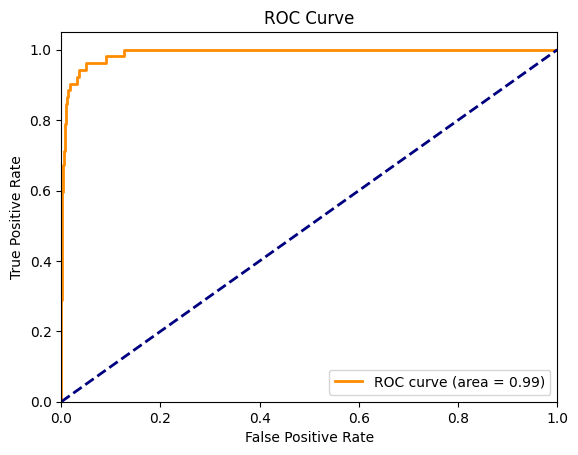

In [53]:
# Plot ROC curve
# source - https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**[5.5]** Save the logistic regression model

In [47]:
dump(lr, '../models/log_reg_week2.joblib')

['../models/log_reg_week2.joblib']

**[5.6]** Predict the probabilities for class 1 i.e. player drafted

In [48]:
y_test_prob = lr.predict_proba(df_test_clean)[:, 1] 

In [49]:
y_test_prob

array([4.26053343e-05, 2.60474269e-06, 8.64130063e-04, ...,
       4.98153066e-08, 1.01981527e-07, 3.31354620e-06])

In [50]:
# round it up to 3 decimals
y_test_prob_rounded = np.round(y_test_prob, 3)

**[5.7]** Save the output into a dataframe with two columns viz. `player_id` and `drafted` to save it into a csv file

In [51]:
output = pd.DataFrame({'player_id': df_test.player_id, 'drafted': y_test_prob_rounded})
output.to_csv('../submission_files/pred1_log_reg_week2.csv', index=False)